In [76]:
! pip install missingno


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
!pip3 install -U scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
#Import the necessary libraries
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [79]:
data = pd.read_csv(r'C:\Users\hp\data_science\0105-data-prep-project-BettyKagendo\chip_dataset.csv')
data.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [81]:
#change datetime flow
data['Release Date'] = pd.to_datetime(data['Release Date'])

### Exploring the missingness of the data

In [82]:
#Get the columns with null values
missing_data = data.isnull().mean() * 100
missing_data

Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Release Date              1.545117
Process Size (nm)         0.185414
TDP (W)                  12.896580
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
FP16 GFLOPS              88.957561
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
dtype: float64

In [83]:
#missing categorical variables
categorical_var = data.select_dtypes(include = ['object']).columns
categories_missing =  data[categorical_var].isnull().mean() * 100 
categories_missing

Product    0.0
Type       0.0
Foundry    0.0
Vendor     0.0
dtype: float64

In [84]:
#Missing numerical variables
num_vars = data.select_dtypes (include = [np.number]).columns
num_missing = data[num_vars].isnull().mean() * 100
num_missing

Unnamed: 0                0.000000
Process Size (nm)         0.185414
TDP (W)                  12.896580
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
Freq (MHz)                0.000000
FP16 GFLOPS              88.957561
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
dtype: float64

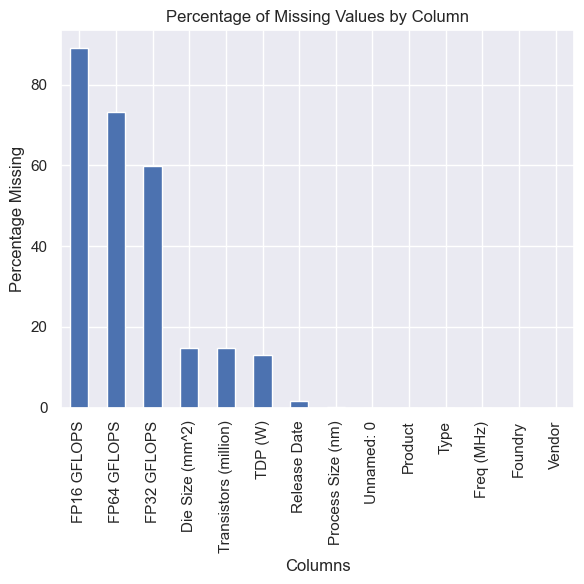

FP16 GFLOPS              88.957561
FP64 GFLOPS              73.094355
FP32 GFLOPS              59.868150
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
TDP (W)                  12.896580
Release Date              1.545117
Process Size (nm)         0.185414
Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
dtype: float64

In [85]:
#Calculate the percentage of missing values for each column
missing_percentages = (data.isnull().sum() / len(data)) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)

# Plot the missingness
plt.figure(figsize=(6, 6))
missing_percentages.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

missing_percentages

In [86]:
data.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [87]:
#drop columns
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD


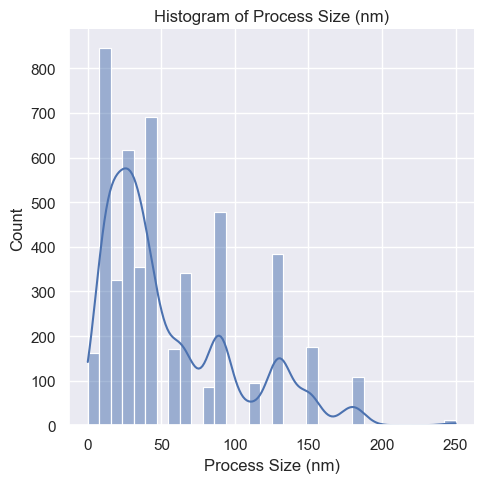

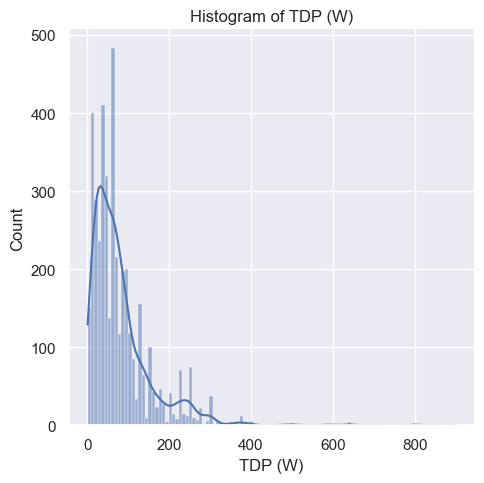

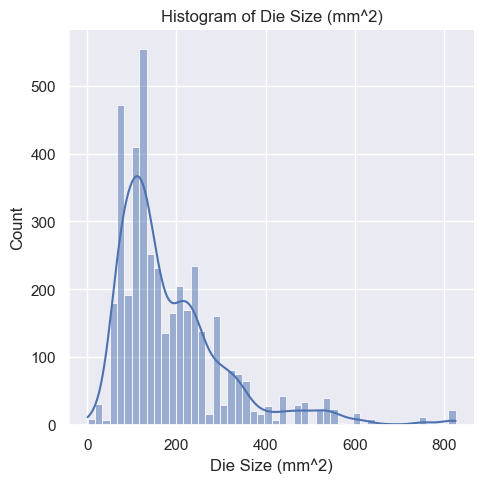

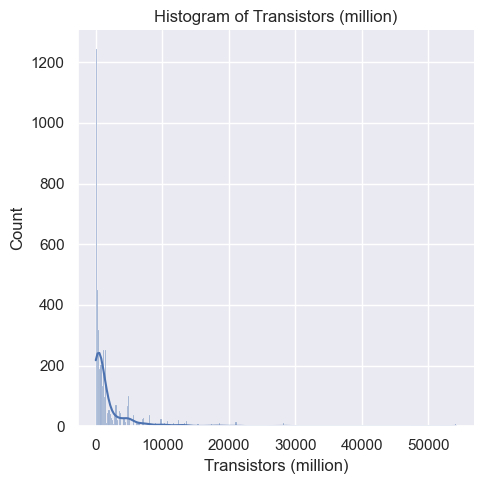

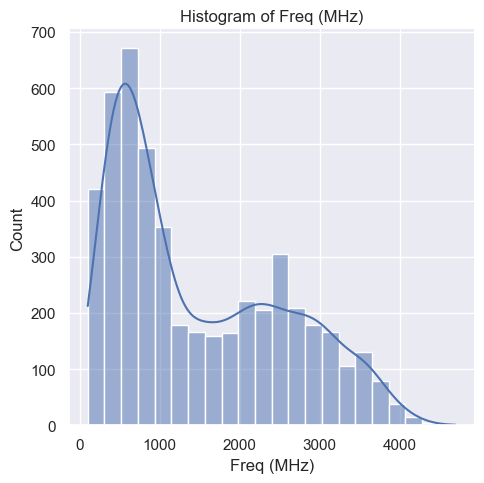

In [88]:
#plot data distribution for numerical variables
for i in data.select_dtypes(include=[np.number]).columns:
    sns.displot(data[i], kde=True)
    plt.title(f'Histogram of {i}')
    plt.tight_layout()
    plt.show()

In [89]:
# select columns to drop based on a threshold
columns_to_drop = num_missing[num_missing > 50].index
columns_to_drop

Index(['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'], dtype='object')

In [ ]:
data = data.drop(columns = columns_to_drop)

<Axes: >

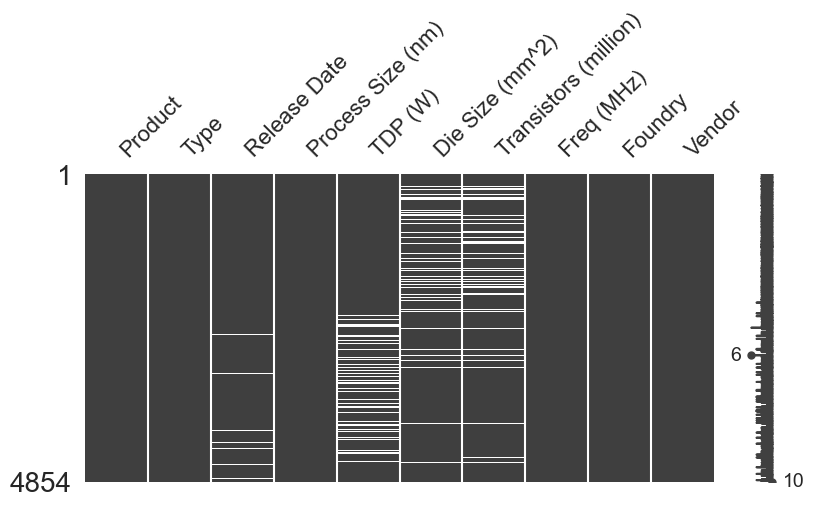

In [90]:
#Identifying the type of missingness
msno.matrix(data, figsize =(9,4))

In [91]:
# Missingness completely at random : Release date, TDP(W)
# Missingness at random : Die Size, Transistors

## Handling  the missingness

### TDP (W), Process Size (nm) and release date
Missing values filled with mean because the type of missingness is MCAR

In [107]:
columns = data[['TDP (W)', 'Process Size (nm)','Release Date' ]]

# Calculate the mean
mean = columns.mean

# Fill missing values in the selected columns with the respective means
columns = columns.fillna(mean)

# Update the original dataframe
data[['TDP (W)', 'Process Size (nm)', 'Release Date']] = columns

### Die Size and Transistors
KNN imputation uses since the missingness in these columns is MAR

In [108]:

numeric_columns = ['Die Size (mm^2)', 'Transistors (million)']
X = data[numeric_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Fill missing values
X_imputed = imputer.fit_transform(X_scaled)

# Convert back to original scale
X_imputed_original = scaler.inverse_transform(X_imputed)

# Update the original dataframe with imputed values
data[numeric_columns] = X_imputed_original

# Convert 'Release Date' back to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'], unit='s')


### Confirm that missingness handling

In [109]:
#Missing numerical variables
num_vars = data.select_dtypes (include = [np.number]).columns
num_missing = data[num_vars].isnull().mean() * 100
num_missing

Process Size (nm)        0.0
TDP (W)                  0.0
Die Size (mm^2)          0.0
Transistors (million)    0.0
Freq (MHz)               0.0
Power Density            0.0
Release Month            0.0
Release Year             0.0
Month_sin                0.0
Month_cos                0.0
dtype: float64

## Exploratory Data Analysis

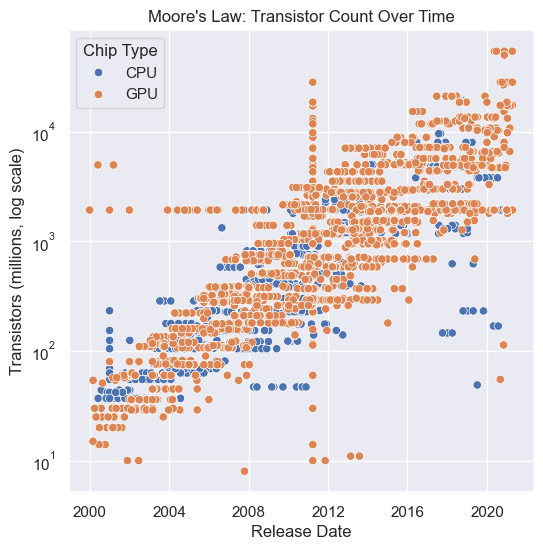

In [110]:
# 1. Moore's Law - Transistor count over time
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data, x='Release Date', y='Transistors (million)', hue='Type')
plt.title("Moore's Law: Transistor Count Over Time")
plt.yscale('log')
plt.ylabel('Transistors (millions, log scale)')
plt.legend(title='Chip Type')
plt.show()

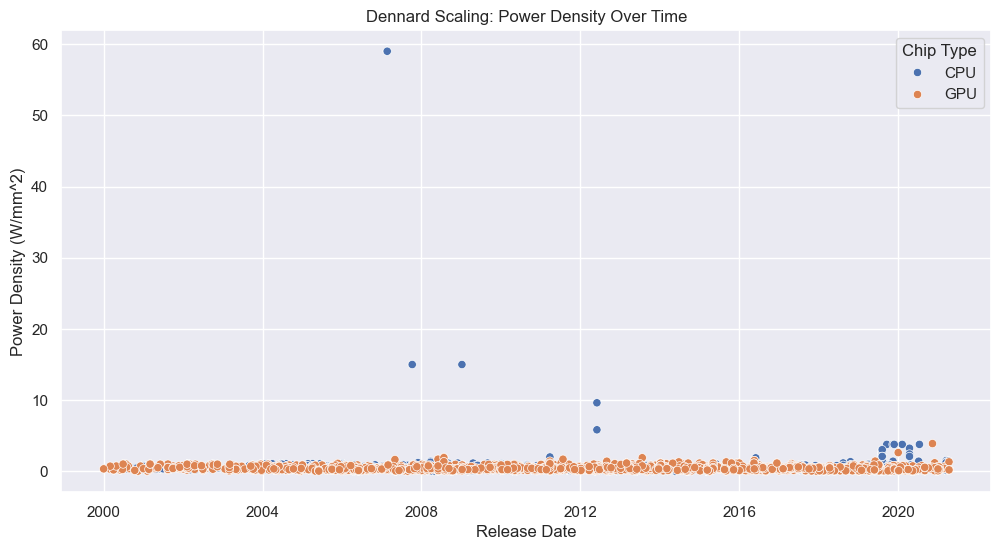

In [111]:
# 2. Dennard Scaling - Power density over time
data['Power Density'] = data['TDP (W)'] / data['Die Size (mm^2)']
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Release Date', y='Power Density', hue='Type')
plt.title("Dennard Scaling: Power Density Over Time")
plt.ylabel('Power Density (W/mm^2)')
plt.legend(title='Chip Type')
plt.show()

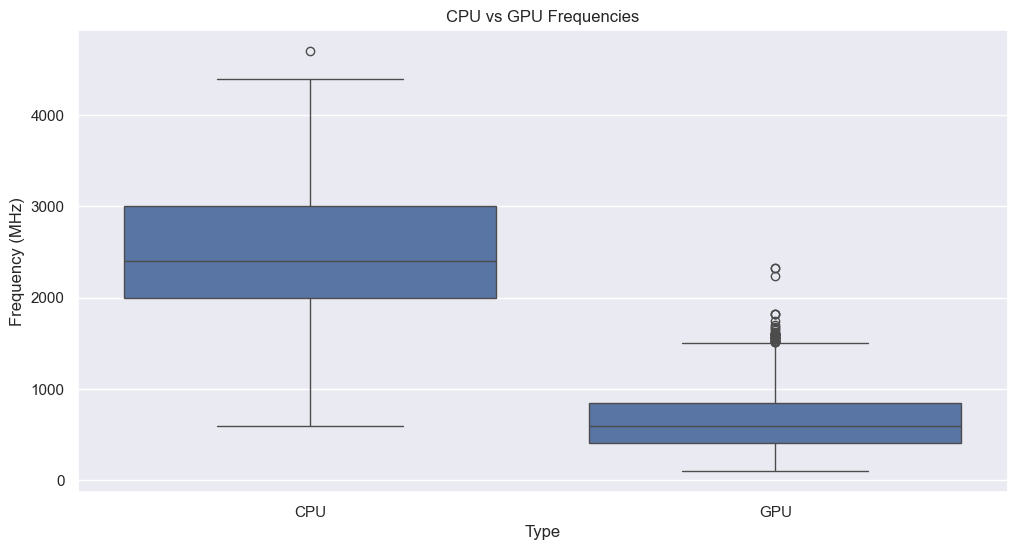

In [99]:
# 3. CPU vs GPU frequencies
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Type', y='Freq (MHz)')
plt.title("CPU vs GPU Frequencies")
plt.ylabel('Frequency (MHz)')
plt.show()

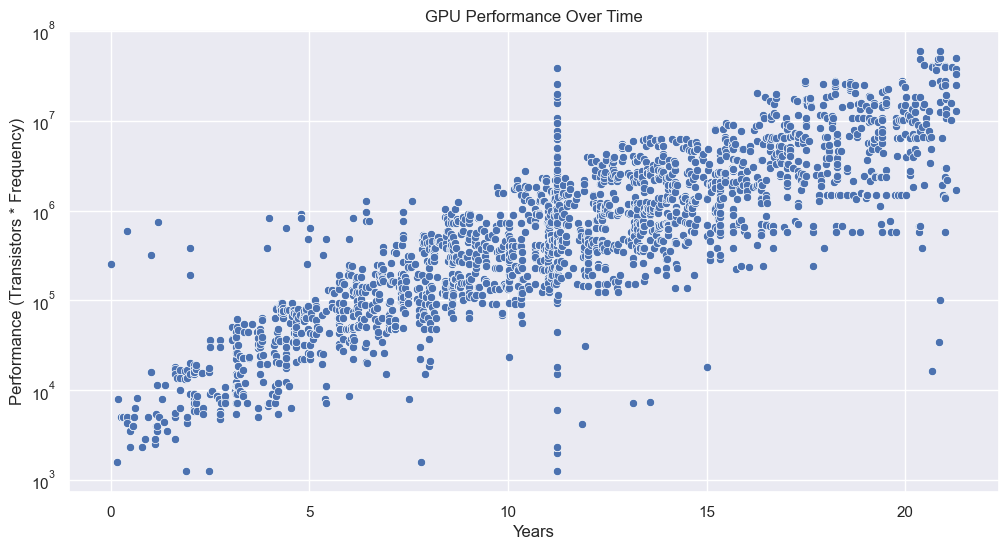

GPU performance doubles every 2.05 years


In [100]:
# 4. GPU performance over time
gpu_data = data[data['Type'] == 'GPU'].sort_values('Release Date')
gpu_data['Years'] = (gpu_data['Release Date'] - gpu_data['Release Date'].min()).dt.total_seconds() / (365.25 * 24 * 60 * 60)
gpu_data['Performance'] = gpu_data['Transistors (million)'] * gpu_data['Freq (MHz)']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=gpu_data, x='Years', y='Performance')
plt.title("GPU Performance Over Time")
plt.ylabel('Performance (Transistors * Frequency)')
plt.yscale('log')
plt.show()

# Calculate doubling time
performance_growth_rate = np.log(2) / stats.linregress(gpu_data['Years'], np.log(gpu_data['Performance'])).slope
print(f"GPU performance doubles every {performance_growth_rate:.2f} years")


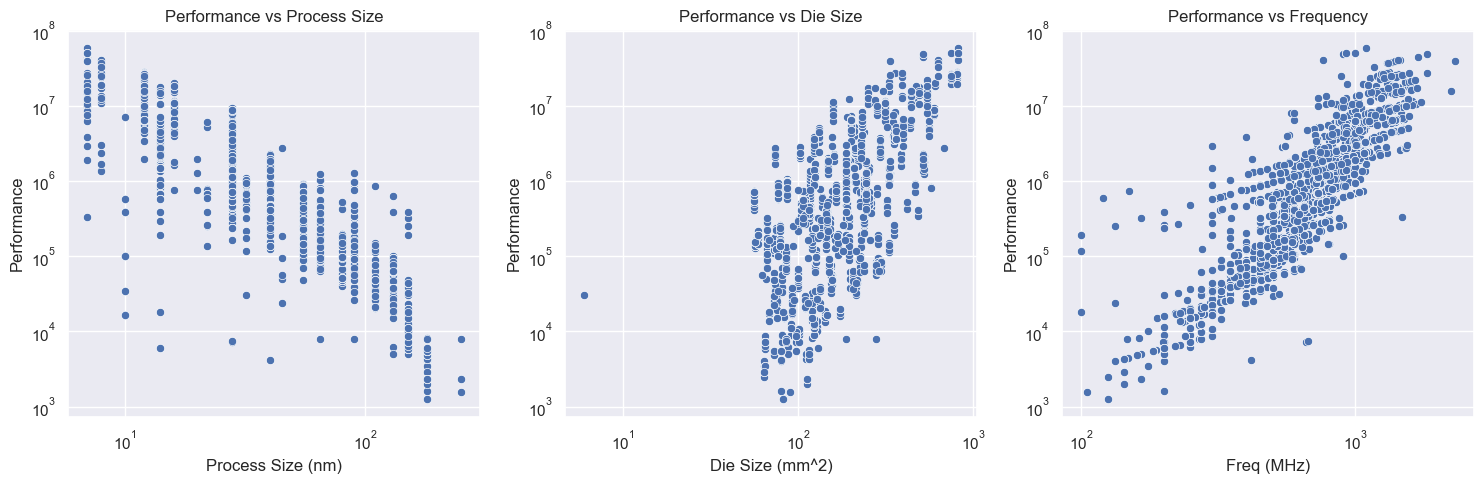

In [101]:
# 5. GPU performance factors
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.scatterplot(data=gpu_data, x='Process Size (nm)', y='Performance')
plt.title("Performance vs Process Size")
plt.xscale('log')
plt.yscale('log')

plt.subplot(132)
sns.scatterplot(data=gpu_data, x='Die Size (mm^2)', y='Performance')
plt.title("Performance vs Die Size")
plt.xscale('log')
plt.yscale('log')

plt.subplot(133)
sns.scatterplot(data=gpu_data, x='Freq (MHz)', y='Performance')
plt.title("Performance vs Frequency")
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()



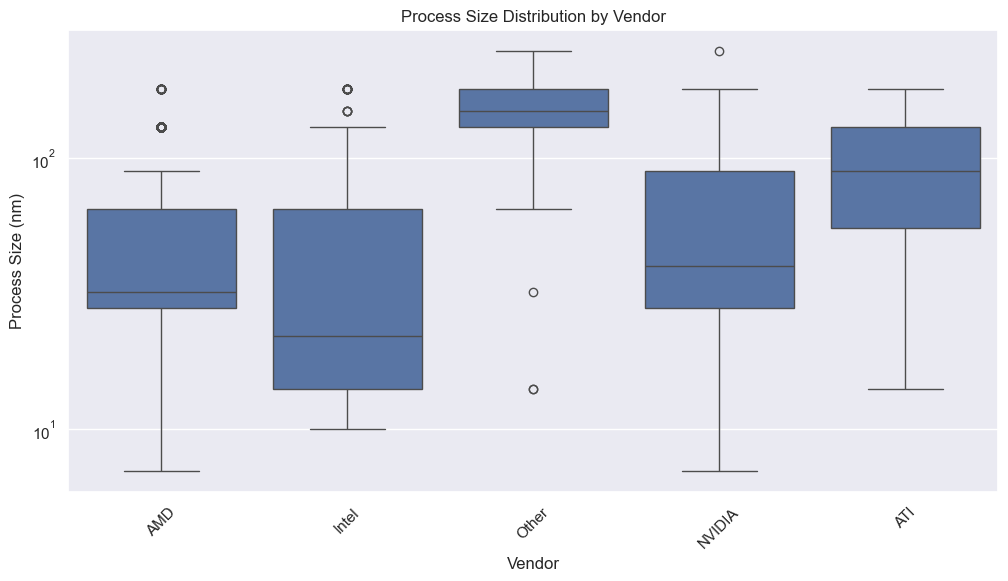

In [102]:
# 6. Process Size distribution by vendor
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Vendor', y='Process Size (nm)')
plt.title("Process Size Distribution by Vendor")
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

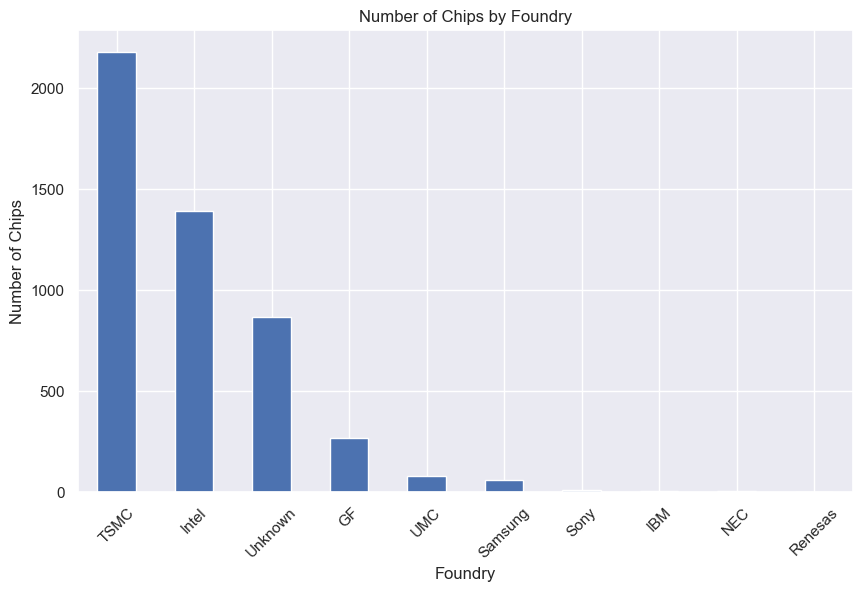

The foundry with the highest number of chips is: TSMC


In [103]:
# 7. Chip count by foundry
foundry_counts = data['Foundry'].value_counts()
plt.figure(figsize=(10, 6))
foundry_counts.plot(kind='bar')
plt.title("Number of Chips by Foundry")
plt.xlabel("Foundry")
plt.ylabel("Number of Chips")
plt.xticks(rotation=45)
plt.show()

# Print the foundry with the highest chip count
print(f"The foundry with the highest number of chips is: {foundry_counts.index[0]}")

### Calculate and visualize the correlation among the features

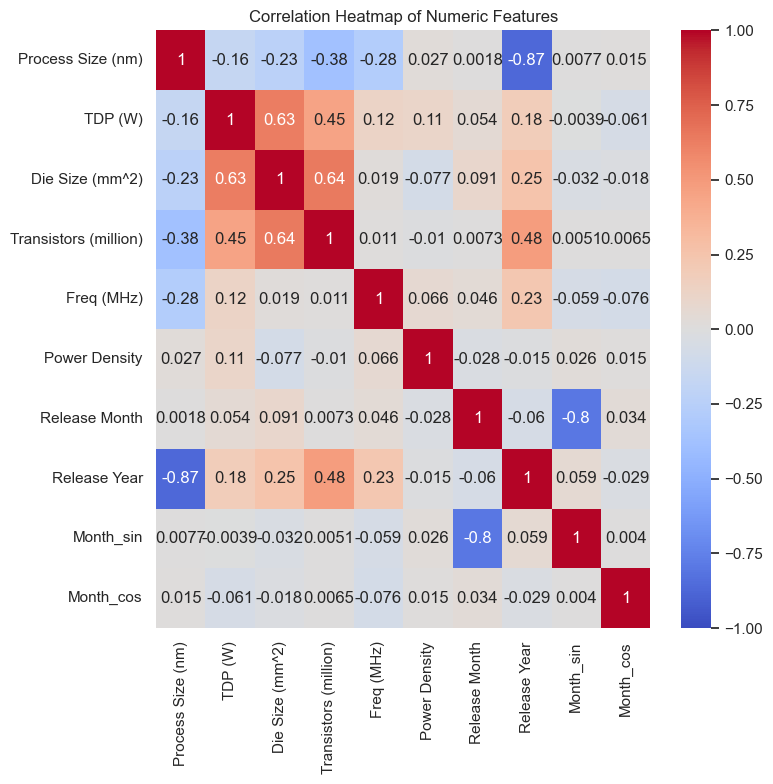

                       Process Size (nm)   TDP (W)  Die Size (mm^2)  \
Process Size (nm)               1.000000 -0.164453        -0.231910   
TDP (W)                        -0.164453  1.000000         0.632803   
Die Size (mm^2)                -0.231910  0.632803         1.000000   
Transistors (million)          -0.380442  0.452615         0.644831   
Freq (MHz)                     -0.278269  0.117569         0.019200   
Power Density                   0.026571  0.108687        -0.076537   
Release Month                   0.001779  0.053562         0.091318   
Release Year                   -0.872728  0.184839         0.251419   
Month_sin                       0.007674 -0.003897        -0.031738   
Month_cos                       0.015094 -0.061185        -0.018115   

                       Transistors (million)  Freq (MHz)  Power Density  \
Process Size (nm)                  -0.380442   -0.278269       0.026571   
TDP (W)                             0.452615    0.117569       0.108

In [112]:
# Select numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# Print the correlation matrix
print(correlation_matrix)

### Perform encoding for categorical variables

In [105]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Identify columns for one-hot encoding (fewer than 10 unique values) and label encoding
onehot_columns = [col for col in categorical_columns if data[col].nunique() < 10]
label_columns = [col for col in categorical_columns if data[col].nunique() >= 10]

# Create month and year features from Release Date
data['Release Month'] = data['Release Date'].dt.month
data['Release Year'] = data['Release Date'].dt.year

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(data[onehot_columns])
onehot_feature_names = onehot_encoder.get_feature_names_out(onehot_columns)

# Label encoding
label_encoder = LabelEncoder()
label_encoded = data[label_columns].apply(label_encoder.fit_transform)

# Cyclical encoding for month
data['Month_sin'] = np.sin(2 * np.pi * data['Release Month']/12)
data['Month_cos'] = np.cos(2 * np.pi * data['Release Month']/12)

# Combine encoded features with numeric features
numeric_features = data[numeric_columns].drop(['Release Month', 'Release Year'], axis=1, errors='ignore')
encoded_data = pd.concat([numeric_features, 
                          pd.DataFrame(onehot_encoded, columns=onehot_feature_names),
                          label_encoded,
                          data[['Month_sin', 'Month_cos', 'Release Year']]], axis=1)

# Print info about the encoded dataset
print(encoded_data.info())

# Save encoded data to a new CSV file
encoded_data.to_csv('encoded_chip_dataset.csv', index=False)
print("Encoded data saved to 'encoded_chip_dataset.csv'")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Process Size (nm)      4854 non-null   float64
 1   TDP (W)                4854 non-null   float64
 2   Die Size (mm^2)        4854 non-null   float64
 3   Transistors (million)  4854 non-null   float64
 4   Freq (MHz)             4854 non-null   float64
 5   Power Density          4854 non-null   float64
 6   Type_CPU               4854 non-null   float64
 7   Type_GPU               4854 non-null   float64
 8   Vendor_AMD             4854 non-null   float64
 9   Vendor_ATI             4854 non-null   float64
 10  Vendor_Intel           4854 non-null   float64
 11  Vendor_NVIDIA          4854 non-null   float64
 12  Vendor_Other           4854 non-null   float64
 13  Product                4854 non-null   int32  
 14  Foundry                4854 non-null   int32  
 15  Mont